In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests

df = pd.read_json("GameStopStocks.json")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


<p style = "color: #b18f6c">
    Date — The day the stock was observed.<br>
    Open —The price of the stock when the market opened.<br>
    High — The highest recorded price of the stock for the day.<br>
    Low — The lowesr recorded price of the stock for the day.<br>
    Close — The price of the stock when the market closed.<br>
    Adj Close — The adjusted price of a stock when the market closes.<br>
    Volume — The number of stocks being traded in.<br>
</p>

In [4]:
df[df["High"] == df["High"].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


<h3 style = "color: #b18f6c">The day GameStop reached an all time high was the 28th of January back in 2021.</h3>

In [6]:
janCount=0
janTotal=0

for i in range(len(df)):
    if df.loc[i]["Date"].month==1:
        avg=(df.loc[i]["High"]+df.loc[i]["Low"])/2
        janTotal+=avg
        janCount+=1
        
janTotal/janCount

8.394146076404493

In [7]:
novCount=0
novTotal=0

for i in range(len(df)):
    if df.loc[i]["Date"].month==11:
        avg=(df.loc[i]["High"]+df.loc[i]["Low"])/2
        novTotal+=avg
        novCount+=1
        
novTotal/novCount

9.442765287777776

In [8]:
df.loc[0]["Date"].day

13

<Axes: xlabel='Low', ylabel='Volume'>

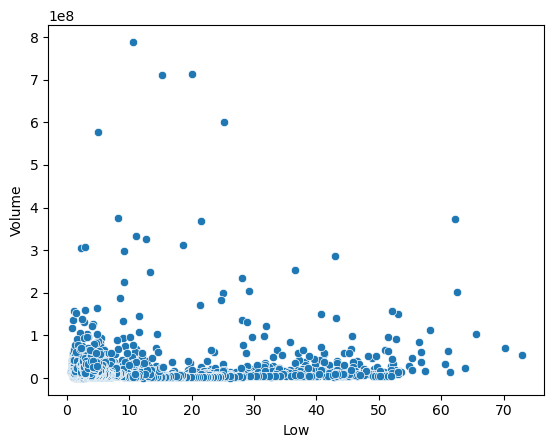

In [9]:
sns.scatterplot(data=df,x="Low", y="Volume")

In [10]:
df["Low"].corr(df["Volume"])

0.10259646883179024

<h3 style = "color: #b18f6c">
    The scatterplot between the low of the day and the time that the stocks close is linear. There is no relationship between the two variables. The persono correlation coefficient is 0.1, so the direction is positive, but the strength is weak.
</h3>

<Axes: xlabel='Date', ylabel='High'>

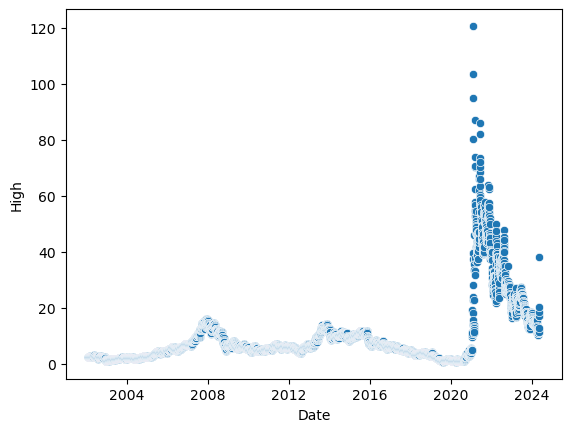

In [12]:
sns.scatterplot(data=df,x="Date", y="High")

In [13]:
log_High=np.log(df["High"])

In [14]:
df["Log High"]=log_High

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log High
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000,0.922273
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600,0.935603
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600,0.918788
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400,0.906240
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800,0.903712


<Axes: xlabel='Date', ylabel='Log High'>

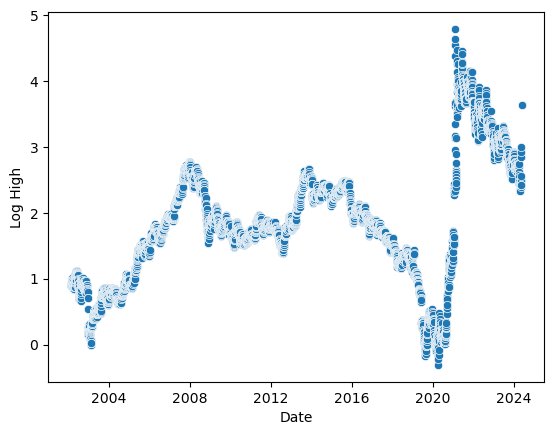

In [16]:
sns.scatterplot(data=df,x="Date", y="Log High")

In [17]:
df['numeric_time']=pd.to_datetime(df['Date']).astype('int64')//10**9
correlation=df['numeric_time'].corr(df['Log High'])
correlation

0.45097470030936626

In [18]:
df["Date"].tail()

5595   2024-05-07
5596   2024-05-08
5597   2024-05-09
5598   2024-05-10
5599   2024-05-13
Name: Date, dtype: datetime64[ns]

<h3 style = "color: #b18f6c">
    The last date found in this dataset is 10 May, 2024.
</h3>

In [20]:
years={}
for i in range(len(df)):
    year=df.loc[i]["Date"].year
    if year not in years.keys() and year!=2024:
        years[year]=1
    elif year in years.keys() and year!=2024:
        years[year]+=1

sum(years.values())/len(years)

250.36363636363637

<h3 style = "color: #b18f6c">
    Aphavantage API: X7TNJP91XQG3GNXL<br>
    Polygon.io API: ddpWc5RD_xHs1qDtuTRHI9iDMGz_EleI
</h3>

In [22]:
url = 'https://api.polygon.io/v1/open-close/GME/2024-05-14?adjusted=false&apiKey=ddpWc5RD_xHs1qDtuTRHI9iDMGz_EleI'
r = requests.get(url)
data = r.json()

print(data)

{'status': 'OK', 'from': '2024-05-14', 'symbol': 'GME', 'open': 64.83, 'high': 64.83, 'low': 36, 'close': 48.75, 'volume': 206973629.0, 'afterHours': 51, 'preMarket': 40.31}


In [23]:
def gather_data(start, end):
    data = {"Date": [],"Open": [],"High": [],"Low": [],"Close": [],"Volume": []}

    startMonth = pd.to_datetime(start).month
    endMonth = pd.to_datetime(end).month
    
    for month in range(startMonth, endMonth + 1):
        for day in range(1, 26):
            if day < 10:
                current = '2024-0' + str(month) + '-0' + str(day)
            else:
                current = '2024-0' + str(month) + '-0' + str(day) 
            
            url = 'https://api.polygon.io/v1/open-close/GME/' + current + '?adjusted=false&apiKey=pqM3pnssdX3a9Ps3whjdxguDpbElVPfg'
            r = requests.get(url)
            jsonData = r.json()
            
            data["Open"].append(jsonData['open'])
            data["High"].append(jsonData['high'])
            data["Low"].append(jsonData["low"])
            data["Close"].append(jsonData['close'])
            data["Volume"].append(jsonData['volume'])
            date = pd.to_datetime(current)
            data["Date"].append(date)
    
            break
        break
    
    return pd.DataFrame(data)

In [24]:
gather_data('2024-05-14', '2024-09-26')

,Date,Open,High,Low,Close,Volume
0,2024-05-01,11.03,11.32,10.7,10.91,2631514.0


In [25]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Log High', 'numeric_time'],
      dtype='object')

In [26]:
df = df.drop('Adj Close', axis=1)
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Log High',
       'numeric_time'],
      dtype='object')

In [27]:
df2 = pd.read_json("recentGME.json")
result = pd.concat([df, df2])
result.reset_index(inplace=True)

In [28]:
url2 = 'https://api.polygon.io/v2/aggs/ticker/AMC/range/1/day/2020-01-01/2024-10-01?adjusted=false&sort=asc&apiKey=ddpWc5RD_xHs1qDtuTRHI9iDMGz_EleI'
r = requests.get(url)
data = r.json()

print(data)

{'status': 'OK', 'from': '2024-05-14', 'symbol': 'GME', 'open': 64.83, 'high': 64.83, 'low': 36, 'close': 48.75, 'volume': 206973629.0, 'afterHours': 51, 'preMarket': 40.31}


In [29]:
amc = pd.read_csv("AMC.csv")
amc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-18,19.180000,19.790001,18.900000,18.900000,13.593410,5457200
1,2013-12-19,18.900000,19.490000,18.809999,19.490000,14.017754,1605400
2,2013-12-20,19.650000,19.770000,19.400000,19.680000,14.154409,737100
3,2013-12-23,19.790001,19.990000,19.500000,19.740000,14.197562,698100
4,2013-12-24,19.740000,19.820000,19.500000,19.530001,14.046528,213700


In [30]:
amc.drop(["Adj Close"], inplace=True, axis=1)
amc["Date"] = pd.to_datetime(amc["Date"])
type(amc.loc[0]["Date"])

pandas._libs.tslibs.timestamps.Timestamp

<Axes: xlabel='Date', ylabel='High'>

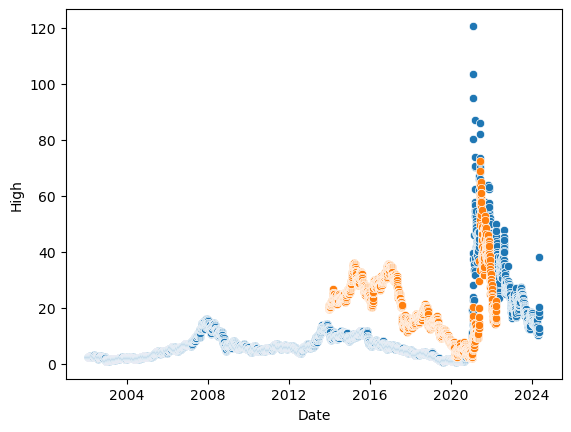

In [31]:
sns.scatterplot(data=df, x="Date", y="High")
sns.scatterplot(data=amc, x="Date", y="High")

In [32]:
wsb=pd.read_json("light_encode_wsb.json")
wsb.head()

,label,timestamp,score,comms_num
0,AMC,2021-01-28,38408,6027
1,AMC,2021-01-29,22404,7023
2,AMC,2021-01-30,66084,11660
3,AMC,2021-01-31,54180,6934
4,AMC,2021-02-01,122882,8710


In [33]:
wsb.rename(columns={"timestamp":"Date"}, inplace=True)
amc_wsb = wsb[wsb["label"] == "AMC"]
amc_wsb["label"].unique()

array(['AMC'], dtype=object)

In [34]:
merged_amc = pd.merge(amc, amc_wsb, how="inner", on="Date")
merged_amc.head()

,Date,Open,High,Low,Close,Volume,label,score,comms_num
0,2021-01-28,11.98,16.50,6.51,8.63,591223900,AMC,38408,6027
1,2021-01-29,14.31,16.00,11.60,13.26,602193300,AMC,22404,7023
2,2021-02-01,17.00,17.25,12.91,13.30,434608000,AMC,122882,8710
3,2021-02-02,9.48,10.10,6.00,7.82,462775900,AMC,16928,3338
4,2021-02-03,8.85,9.77,7.89,8.97,221405100,AMC,97207,7629


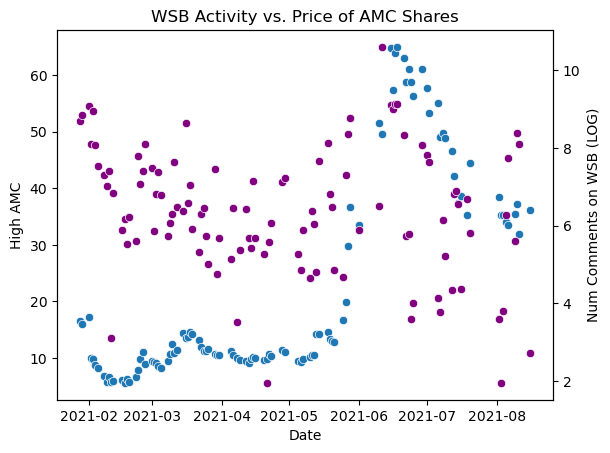

In [35]:
merged_amc["comms_num_log"] = np.log(merged_amc["comms_num"])
import matplotlib.pyplot as plt
ax1 = sns.scatterplot(data=merged_amc, x="Date", y="High")
ax2 = ax1.twinx()
sns.scatterplot(data=merged_amc, x='Date', y='comms_num_log', ax=ax2, color='purple')

ax1.set_ylabel('High AMC')
ax2.set_ylabel('Num Comments on WSB (LOG)')
plt.title('WSB Activity vs. Price of AMC Shares')

plt.show()

<Axes: xlabel='Date', ylabel='High'>

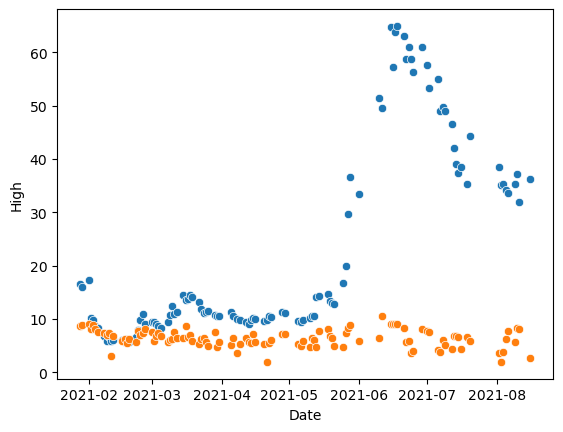

In [36]:
sns.scatterplot(data=merged_amc, x="Date", y="High")
sns.scatterplot(data=merged_amc, x="Date", y="comms_num_log")